1.Number of multiplications: n*k*p; Number of additions: n*(k-1)*p

reason: In matrix multiplication, first row of first matrix (n*k) is multiplies with first column of second matrix(k*p).As the number of elements in first row and first column of both matrices is k, the number of multiplications are k and additions are k-1 (to add k numbers we need k-1 add operators). So, for first row and first column, the multiplications are k and additions are k-1. We know that each row of first matrix is multiplies with each column of second matrix and as number of rows and coulumns in first and second matrices are n and p respectvely, the number of multiplication sare n*k*p and additions are n*(k-1)*p.

2. Creating two methods named mul and mul_np where mul is implemeted using lists and mul_np is implemeted using numpy

In [3]:
import numpy as np

In [5]:
def mul(A,B):
    C=[[sum(a * b for a, b in zip(A_r, B_c)) for B_c in zip(*B)]  for A_r in A]
    return C
def mul_np(A,B):
    return A @ B
A=[[1,2,3],[4,5,6],[7,8,9]]
B=[[1,0,0],[0,1,0],[0,0,1]]
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
b=np.array([[1,0,0],[0,1,0],[0,0,1]])
%timeit mul(A,B)
%timeit mul_np(a,b)

            

18.6 µs ± 859 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.81 µs ± 63.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Execution using numpy is faster than list of lists.
Reason:
An array is a collection of homogeneous data-types that are stored in contiguous memory locations. On the other hand, a list in Python is a collection of heterogeneous data types stored in non-contiguous memory locations.
The NumPy package breaks down a task into multiple fragments and then processes all the fragments parallelly.
The NumPy package integrates C, C++, and Fortran codes in Python. These programming languages have very little execution time compared to Python.

3. Finding median using passes requires n/2 passes, thus the time complexity is $O(n^2)$. The better way would be sorting the array and finding the middle element, where time complexity is O(nlogn) i.e. O(nlogn) for sortimg and O(1) for accessing middle element.


In [20]:
def med(b):
    a=b[:]
    length=len(a)
    a=list(b)
    if length%2!=0:
        for i in range(length//2):
            maxi=max(a)
            a.remove(maxi)
        return max(a)
    else:
        for i in range(length//2):
            maxi=max(a)
            a.remove(maxi)
        return (maxi+max(a))//2
def med_better(a):
    b=a[:]
    b.sort()
    middle=len(b)//2
    return (b[middle]+b[~middle])/2
def med_np(a):
    return np.median(a)

a=np.random.randint(1000,size=1000)
%timeit med(a)
%timeit med_better(a)
%timeit med_np(a)
print(med(a),med_better(a),med_mp(a))
    

8.76 ms ± 58.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.35 µs ± 25.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
21.1 µs ± 50.8 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
487 487.5 487.5


first method: med
second method: med_better
As per the implementation, the first method which includes passes is slower compared numpy.median and second method is faster than numpy.median 
performance: med < med_numoy < med_better
    
but it also depends on size of array, if size of array is small, then numpy.median is worse

4.  Gradient of given function is [$2xy+y^3cos(x)$, $x^2y+3y^2sin(x)$]


9. plottind using matplotlib

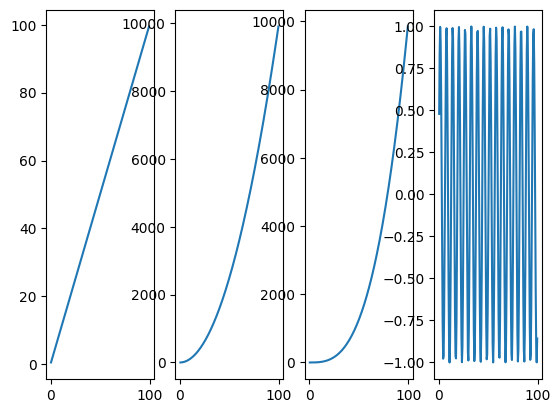

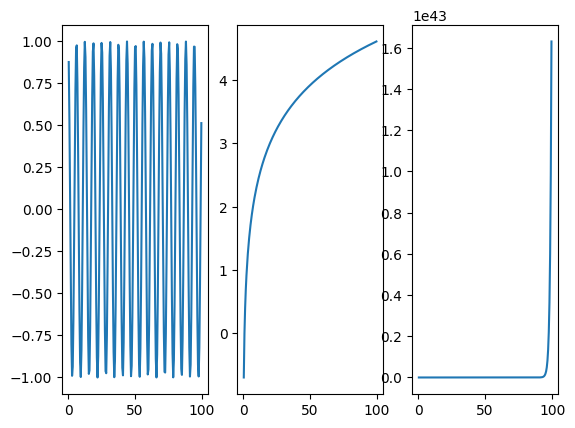

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
x=np.arange(0.5,100.0,0.5)
y1=x
y2=x*x
y3=(x**3)/100
y4=np.sin(x)
y5=np.cos(x)
y6=np.log(x)
y7=np.exp(x)
figure, axis = plt.subplots(1, 4)
axis[0].plot(x,y1)
axis[1].plot(x,y2)
axis[2].plot(x,y3)
axis[3].plot(x,y4)
figure,axis1=plt.subplots(1,3)
axis1[0].plot(x,y5)
axis1[1].plot(x,y6)
axis1[2].plot(x,y7)
plt.show()

10. Create Pandas dataframe

In [103]:
import pandas as pd
np.random.seed(42)
df=pd.DataFrame(np.random.uniform(1,2,[20,5]),columns=['a','b','c','d','e'])
df_std=df.std()
maxi_std=max(df_std)
for i,j in df_std.items():
    if j==maxi_std:
        column=i
print('Max Standard Deviation column:',column,'and its value is:',maxi_std) #max standard deviation column
df_mean=df.mean(axis=1)
min_mean=min(df_mean)
for i,j in df_mean.items():
    if j==min_mean:
        column=i
print('Minimum mean row:',column,'and its value is:',min_mean) #min mean row

Max Standard Deviation column: c and its value is: 0.31862833120007994
Minimum mean row: 11 and its value is: 1.3153814438335967


11. Adding new columns f and g

In [118]:
df['f']= df.loc[:,['a','b','c','d','e']].sum(axis=1)
df['g']=np.where(df['f']>8,'GT8','LT8')
df['g'].value_counts()['LT8']
df_LT8=df.loc[df['g']=='LT8']
df_GT8=df.loc[df['g']=='GT8']
print('standard deviation of LT8 f column:',df_LT8['f'].std())
print('standard deviation of GT8 f column:',df_GT8['f'].std())

standard deviation of LT8 f column: 0.4025886500663061
standard deviation of GT8 f column: 0.7956146881961926
